In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading dataset

data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#analyzing shape of dataset

data.shape

(167, 10)

Its a small dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


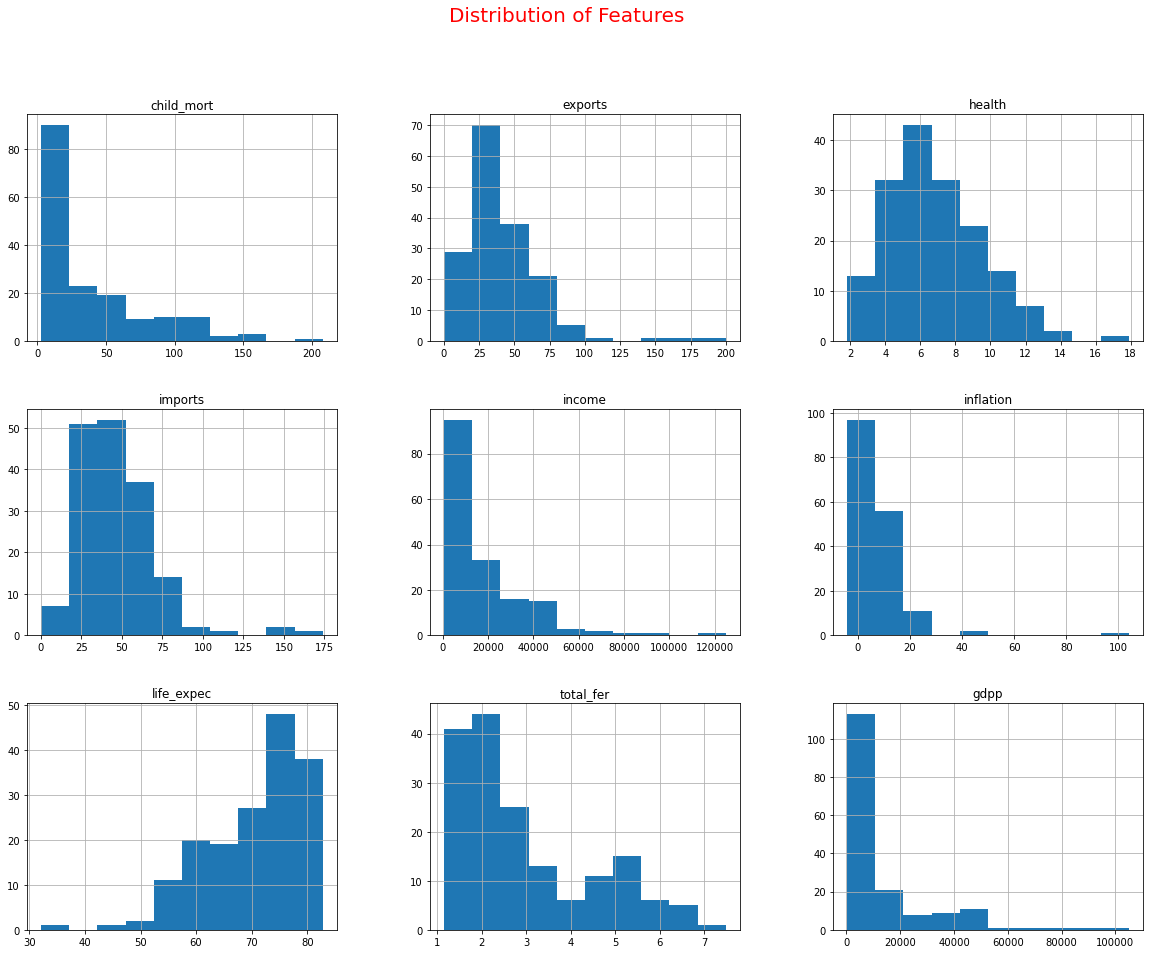

In [6]:
# distribution

num_fea = data.select_dtypes(exclude='object')
num_fea.hist(figsize=(20,15))
plt.suptitle('Distribution of Features', color='red', fontsize=20)
plt.show()

Most of the features are not normally distributed, instead they are skewed which shows that there might be outliers in the features.

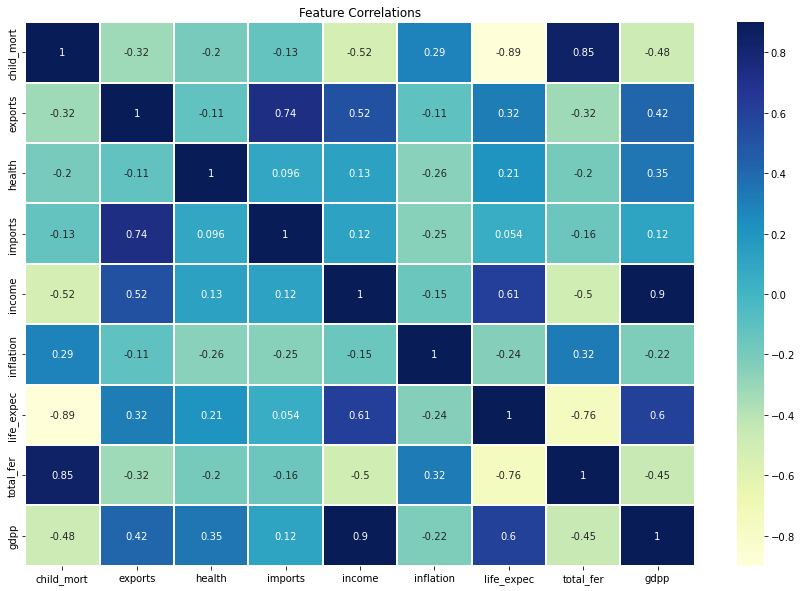

In [7]:
# correlation of features

plt.figure(figsize=(15,10))
sns.heatmap(data=data.corr(), vmin=-0.9, vmax=0.9, annot=True, linewidth=0.2, cmap='YlGnBu')
plt.title('Feature Correlations')
plt.show()

▪️ Life expectancy and child mortality shows high negative correlation.

▪️ child mortality and total fertility have high positive correlation.

▪️ income and gdpp have high positive correlation.

Since there are highly correlated features we can use PCA for dimensionality reduction

### Preprocessing

In [8]:
# checking for null values

data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No null values in our dataset

In [9]:
# droping 'country' column as we need only numeric features for unsupervised learning

d1 = data.drop(['country'], axis=1)
d1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
d1.shape

(167, 9)

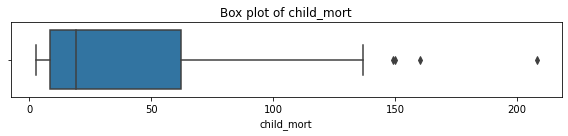

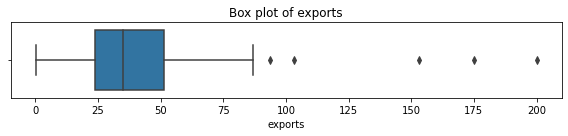

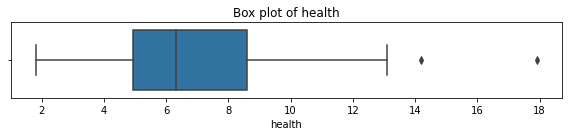

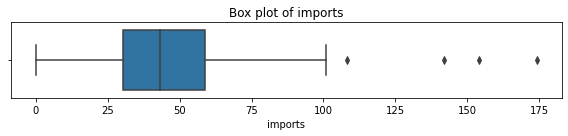

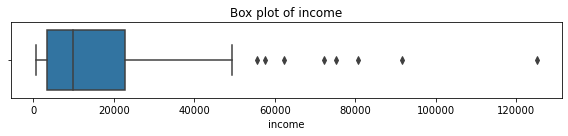

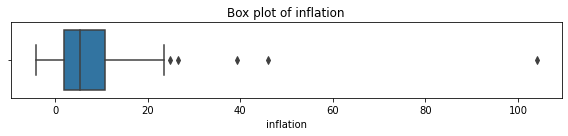

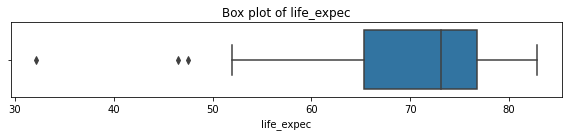

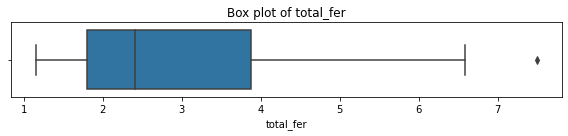

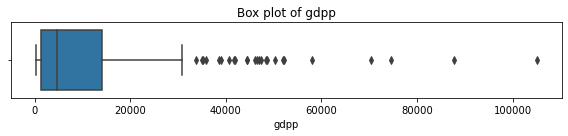

In [11]:
# checking for outliers

for columns in d1.columns:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=d1[columns])
    plt.title('Box plot of {}'.format(columns))
    plt.tight_layout()
    plt.show()

There are outliers in the features.

But in this analysis, we are not removing/handling outliers since they could be very informative. They could point out countries that are in critical condition and are in the direst need of aid.

### Scaling

In [12]:
# Stanard Scaling

columns = d1.columns

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
d1_std = std_scaler.fit_transform(d1)
d1_std = pd.DataFrame(d1_std, columns=columns)

In [13]:
# MinMax Scaling

from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
d1_min_max = mm_scaler.fit_transform(d1)
d1_min_max = pd.DataFrame(d1_min_max, columns=columns)

## PCA

#### PCA with standard scaled data

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(d1_std)
d1_std_pca = pca.transform(d1_std)
print('Total number of principal componemnts: ',pca.n_components_)

Total number of principal componemnts:  9


In [15]:
#percentage variation

per_var = pca.explained_variance_ratio_*100
per_var = np.round(per_var, 1)
per_var

array([46. , 17.2, 13. , 11.1,  7.3,  2.5,  1.3,  1. ,  0.7])

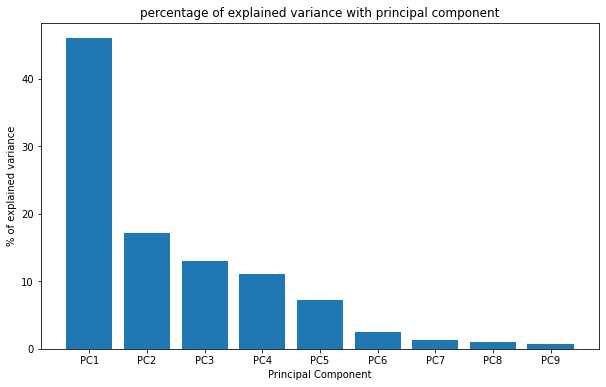

In [16]:
#plotting percentage of explained variance with principal component

labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(10,6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of explained variance')
plt.xlabel('Principal Component')
plt.title('percentage of explained variance with principal component')
plt.show()

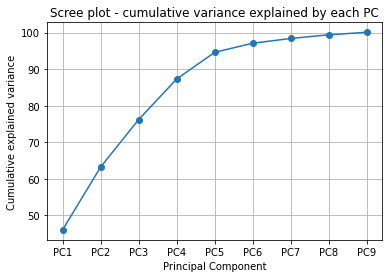

In [17]:
# cumulative variance explained by each PC

cum_var = np.cumsum(per_var)
plt.plot(labels, cum_var, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative explained variance')
plt.title('Scree plot - cumulative variance explained by each PC')
plt.grid()
plt.show()

Four principal components can explain about 90% of the distribution of the original data.

#### PCA with MinMax Scaled Data

In [18]:
# Number of components that can explain about 90% of original data

pca = PCA(0.90)
pca.fit(d1_min_max)
d1_minmax_pca = pca.transform(d1_min_max)
print('Total number of principal componemnts: ',pca.n_components_)

Total number of principal componemnts:  4


After doing PCA with both standardised and normalised versions of the original dataset, we can see that there are 4 principal components can explain about 90% of the distribution of the original data.

In [19]:
d2 = pd.DataFrame(d1_minmax_pca, columns=labels[0:4])
d2.head()

,PC1,PC2,PC3,PC4
0,-0.599078,0.095490,0.157554,-0.024333
1,0.158474,-0.212092,-0.064189,-0.061247
2,0.003686,-0.135867,-0.134182,0.133574
3,-0.650235,0.275975,-0.142672,0.156018
4,0.200711,-0.064662,-0.100715,-0.037902


# Model: K-Means Clustering

### Optimal number of clusters - Elbow Method

In [20]:
import warnings
warnings.filterwarnings('ignore')

1503.0000000000002
1050.2145582853307
831.424435208687
700.3229986404373
620.163371288842
571.9992966496745
495.3233825951917
455.27682760469946
426.45844564714764
396.25069895342983


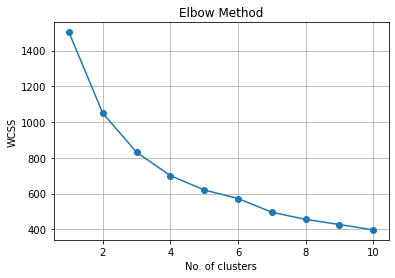

In [21]:
# using standard scaled data

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(d1_std)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

42.79871877568751
25.942443326223344
19.345622038883594
16.781002591696133
14.979315482582143
14.054198234862888
12.633922291732882
11.474480599431047
10.821572892417622
10.063108566620873


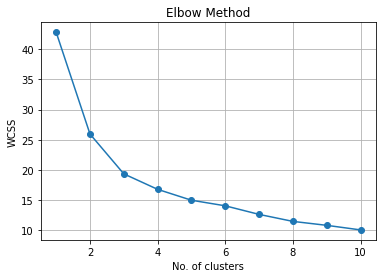

In [22]:
# using minmax scaled data

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(d1_min_max)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

38.705496269080335
21.854349363446612
15.270488827438125
12.736542795687374
11.01575521151553
9.75656946644086
8.577821136990446
7.653625808583527
7.0352788196088065
6.686430890206458


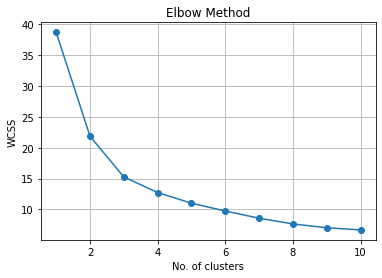

In [23]:
# using minmax scaled + pca data

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(d2)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Using Elbow method applied on a standardised dataset, a minmax scaled dataset and a PCA with 4 components (with minmax scaling) we can see that the optimal number of clusters is 4.

### Optimal number of clusters: Silhouette Method

In [24]:
#using standard scaled data

scores=[]
from sklearn.metrics import silhouette_score
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(d1_std)
    scores.append(silhouette_score(d1_std, kmeans.labels_).round(3))
print(scores)
pd.DataFrame({'k':list(range(2,11)), 'score':scores})

[0.287, 0.283, 0.301, 0.299, 0.235, 0.249, 0.241, 0.203, 0.219]


,k,score
0,2,0.287
1,3,0.283
2,4,0.301
3,5,0.299
4,6,0.235
5,7,0.249
6,8,0.241
7,9,0.203
8,10,0.219


In [25]:
#using minmax scaled data

scores=[]
from sklearn.metrics import silhouette_score
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(d1_min_max)
    scores.append(silhouette_score(d1_std, kmeans.labels_).round(3))
print(scores)
pd.DataFrame({'k':list(range(2,11)), 'score':scores})

[0.309, 0.289, 0.301, 0.204, 0.198, 0.185, 0.201, 0.175, 0.189]


,k,score
0,2,0.309
1,3,0.289
2,4,0.301
3,5,0.204
4,6,0.198
5,7,0.185
6,8,0.201
7,9,0.175
8,10,0.189


In [26]:
#using pca + minmax scaled data

scores=[]
from sklearn.metrics import silhouette_score
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(d2)
    scores.append(silhouette_score(d1_std, kmeans.labels_).round(3))
print(scores)
pd.DataFrame({'k':list(range(2,11)), 'score':scores})

[0.304, 0.286, 0.298, 0.183, 0.21, 0.198, 0.2, 0.165, 0.179]


,k,score
0,2,0.304
1,3,0.286
2,4,0.298
3,5,0.183
4,6,0.210
5,7,0.198
6,8,0.200
7,9,0.165
8,10,0.179


Silhouette score is maximized at k = 4 which is in agreement with optimum number of clusters that we got Elbow method. So, we will take 4 clusters.

### Running K-Means with n_clusters=4

In [27]:
# on standardised data

kmeans = KMeans(n_clusters=4, init='random', random_state=42)

clst_labels_std = kmeans.fit_predict(d1_std)
clst_labels_std

array([1, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 1,
       3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 2, 3,
       2, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 1, 3,
       1, 3, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 3, 3, 0, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       2, 2, 1, 1, 2, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3,
       1, 0, 3, 2, 3, 1, 3, 2, 3, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 3, 3, 3,
       3, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1])

In [28]:
# adding cluster column to standardised dataset

d1_std['Cluster'] = clst_labels_std
d1_std.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,3
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,3
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,3


In [29]:
d1_std['Cluster'].value_counts()

3    87
1    48
2    29
0     3
Name: Cluster, dtype: int64

In [30]:
# on minmax scaled data

clst_labels_minmax = kmeans.fit_predict(d1_min_max)
clst_labels_minmax

array([1, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3,
       3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 2, 3,
       2, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 1, 3,
       1, 3, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 3, 3, 0, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       2, 2, 1, 1, 2, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3,
       1, 0, 3, 2, 1, 3, 2, 2, 3, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 3, 3, 3,
       3, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1])

In [31]:
# adding cluster column to minmax scaled dataset

d1_min_max['Cluster'] = clst_labels_minmax
d1_min_max.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,3
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,3
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,3


In [32]:
d1_min_max['Cluster'].value_counts()

3    88
1    46
2    30
0     3
Name: Cluster, dtype: int64

In [33]:
# on pca dataset

clst_labels_d2 = kmeans.fit_predict(d2)
clst_labels_d2

array([1, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3,
       3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 2, 3,
       2, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 1, 3,
       1, 3, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 3, 3, 0, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       2, 2, 1, 1, 2, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3,
       1, 0, 3, 2, 1, 3, 2, 2, 3, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 3, 3, 3,
       3, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1])

In [34]:
# adding cluster column to dataset (initial dataset without 'country')

d1['Cluster'] = clst_labels_d2
d1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [35]:
d1['Cluster'].value_counts()

3    88
1    46
2    30
0     3
Name: Cluster, dtype: int64

We have only very few items in the 4th cluster. So we are reducing the number of clusters to 3

### Running K-Means with n_clusters=3

In [36]:
kmeans = KMeans(n_clusters=3, init='random', random_state=42)
clst_labels_d2 = kmeans.fit_predict(d2)
d1['Cluster'] = clst_labels_d2
d1['Cluster'].value_counts()

0    86
1    46
2    35
Name: Cluster, dtype: int64

#### visualizing 3 clusters for various pairs of features

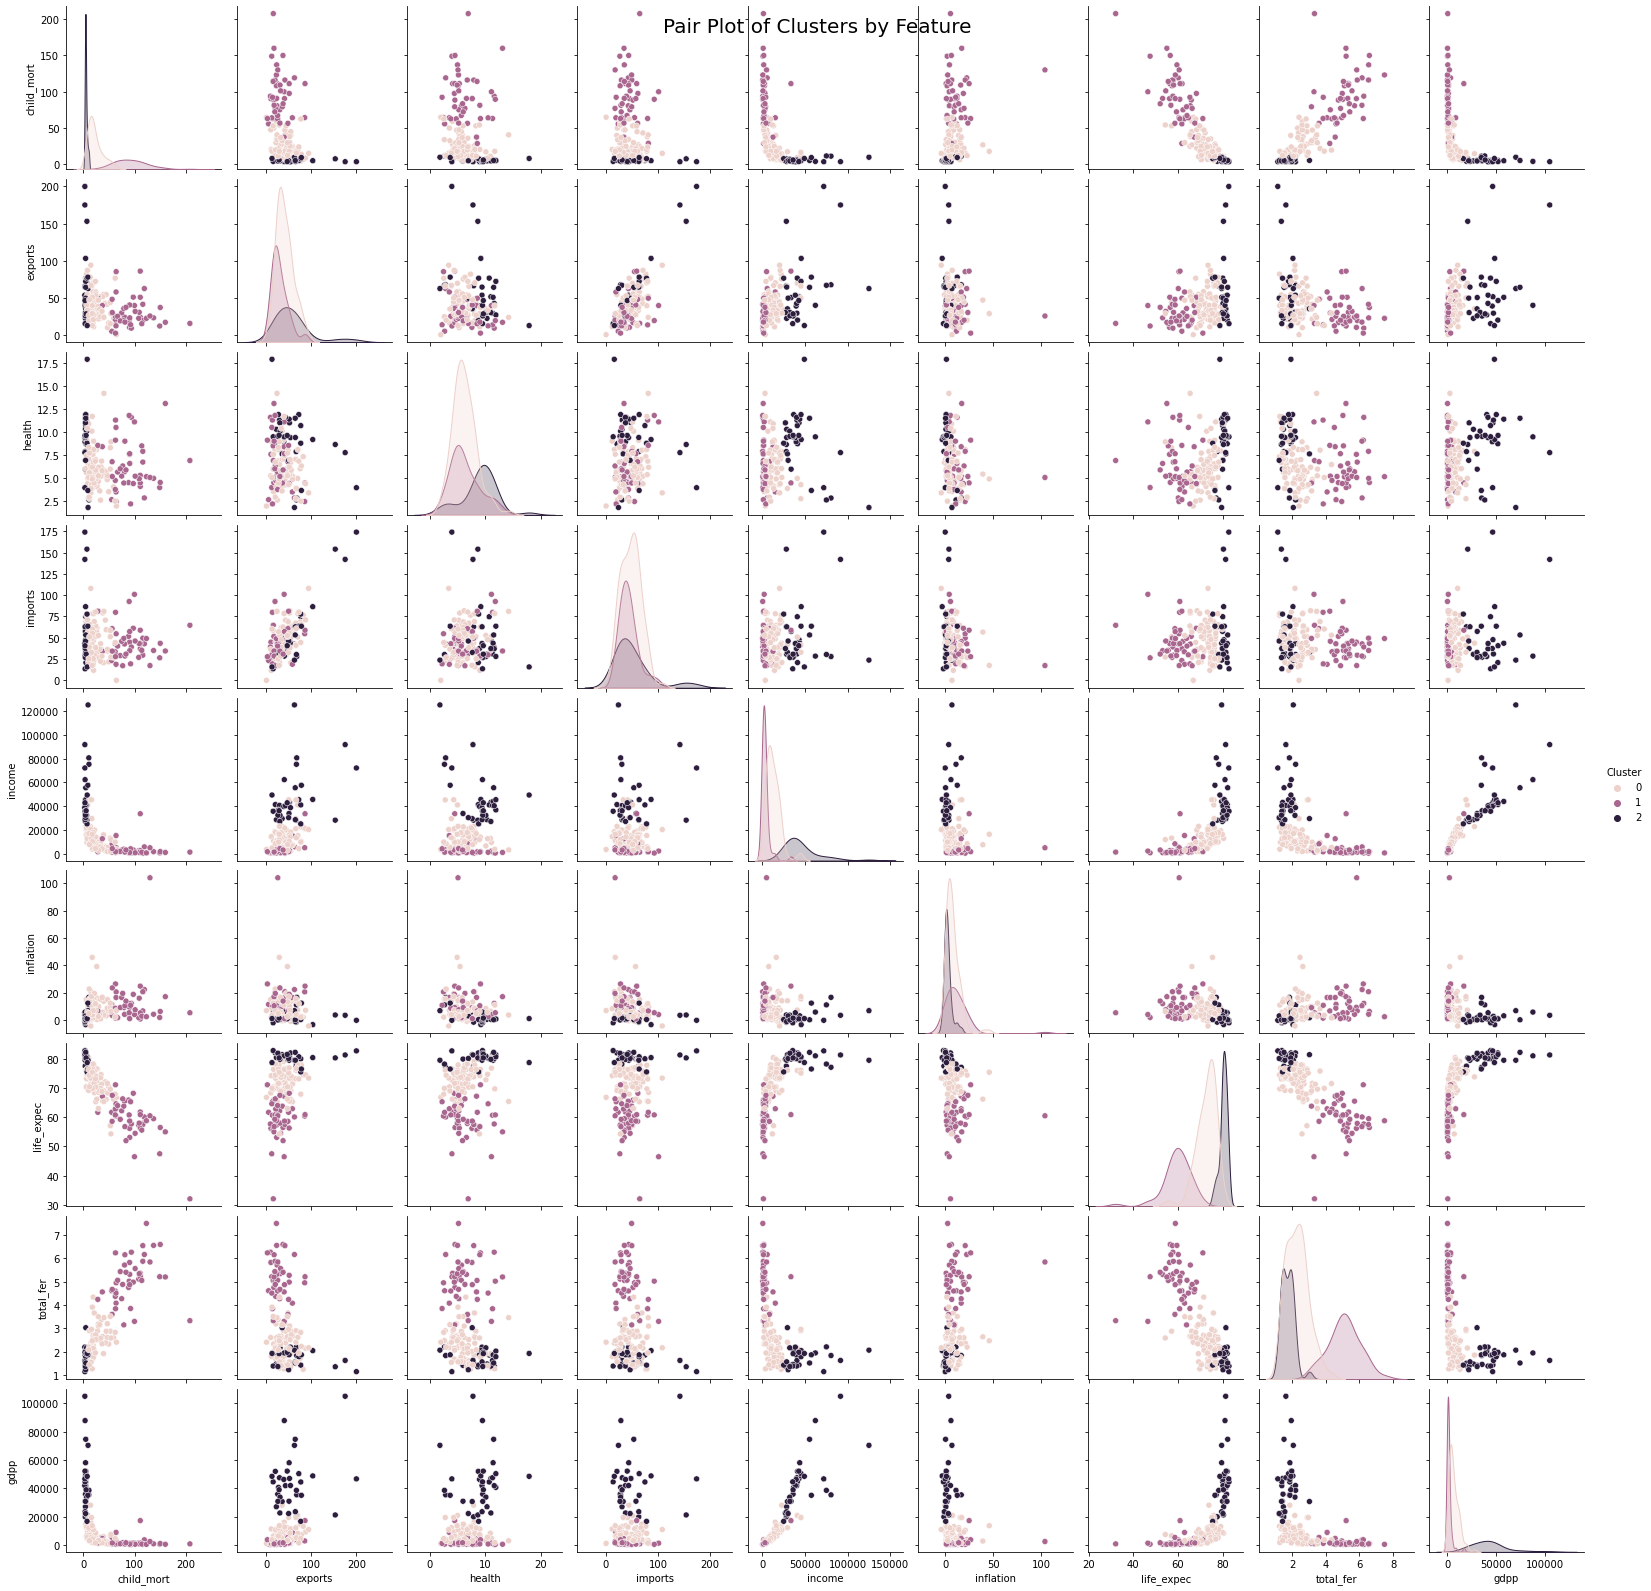

In [37]:
sns.pairplot(d1, hue="Cluster")
plt.suptitle('Pair Plot of Clusters by Feature', size = 20)
plt.show()

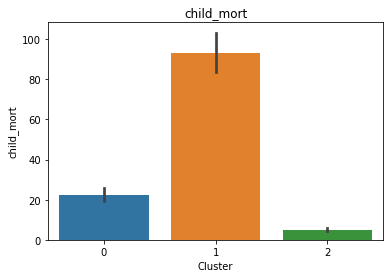

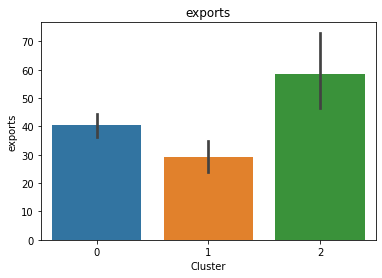

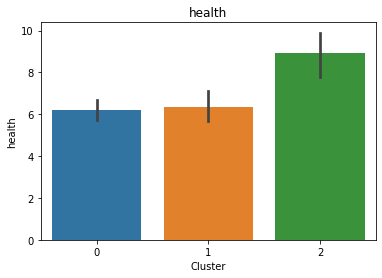

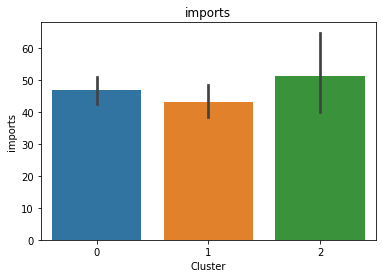

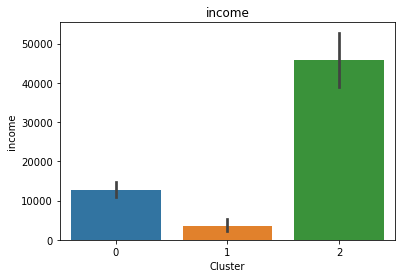

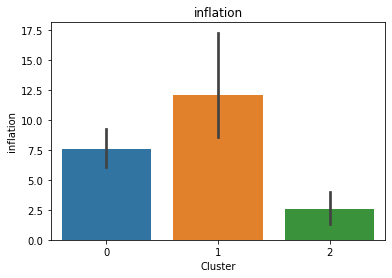

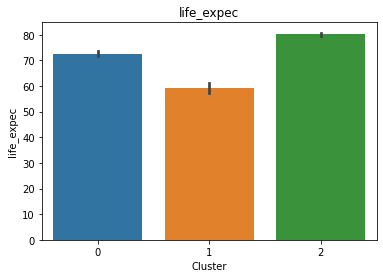

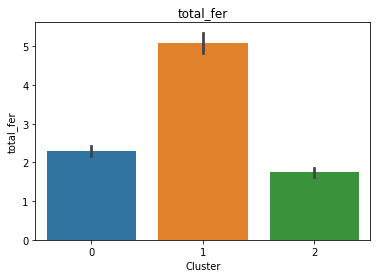

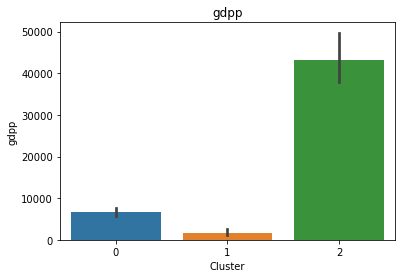

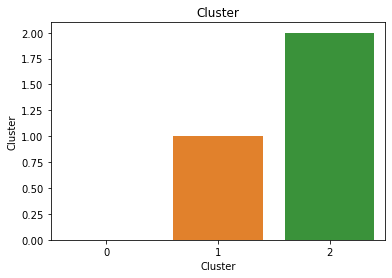

In [38]:
#Visualising Cluster

for columns in d1.columns:
    plt.subplot()
    sns.barplot(x=d1['Cluster'], y=(d1[columns]))
    plt.title('{}'.format(columns))
    plt.show()

In [39]:
clusters1 = d1.groupby(['Cluster']).mean()
clusters1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,22.425581,40.382430,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256,6719.790698
1,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043
2,4.897143,58.431429,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143,43117.142857


### Inference:

Cluster 1 is having highest child mortality rate, inflation and total fertility.

Also Cluster 1 is having lowest exports, imports, income, life expectancy and gdpp.

Hence Cluster 1 requires direst need of aid.

### Adding Cluster column to original dataset

In [40]:
data['Cluster'] = clst_labels_d2.tolist()
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [41]:
# countries included in Cluster 1
cluster_Undeveloped = data[data['Cluster']== 1]
cluster_Undeveloped

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1


These are the countries that require direst need of aid.